# Representation graphique des paramètres ajouté en considérent les variations intrajours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_csv('enricheredaus_sanscluster.csv',index_col=0, parse_dates=['Date'])
df.head()

df['RainToday'].replace({'No': 0}, inplace=True)
df['RainToday'].replace({'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0}, inplace=True)
df['RainTomorrow'].replace({'Yes': 1}, inplace=True)



AxesSubplot(0.566569,0.155278;0.352924x0.277685)
<class 'int'>


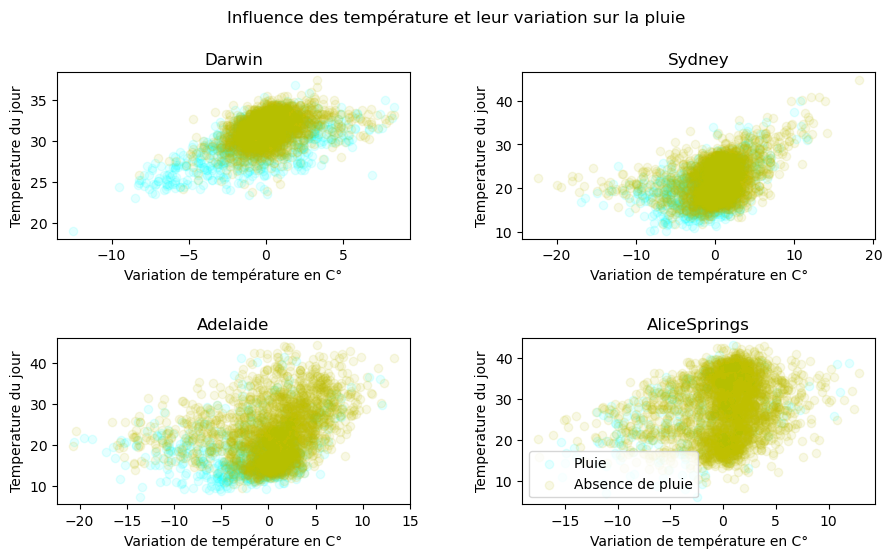

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df['month']=pd.to_datetime(df['Date']).dt.month

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
print(axes[1,1])
i=0

print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    toplot=df[df['Location']==ville]
    ax.scatter('vartemp','Temp3pm',data=toplot.loc[toplot.RainTomorrow==1],c="cyan",alpha=.1 ,label="Pluie")
    ax.scatter('vartemp','Temp3pm',data=toplot.loc[toplot.RainTomorrow==0],c="y",alpha=.1 ,label="Absence de pluie")
    ax.set_xlabel("Variation de température en C°")
    ax.set_ylabel("Temperature du jour")
    ax.set_title(ville)
    i+=1
fig.suptitle("Influence des température et leur variation sur la pluie")
plt.legend()
plt.show()




AxesSubplot(0.566569,0.155278;0.352924x0.277685)
<class 'int'>


<Figure size 640x480 with 0 Axes>

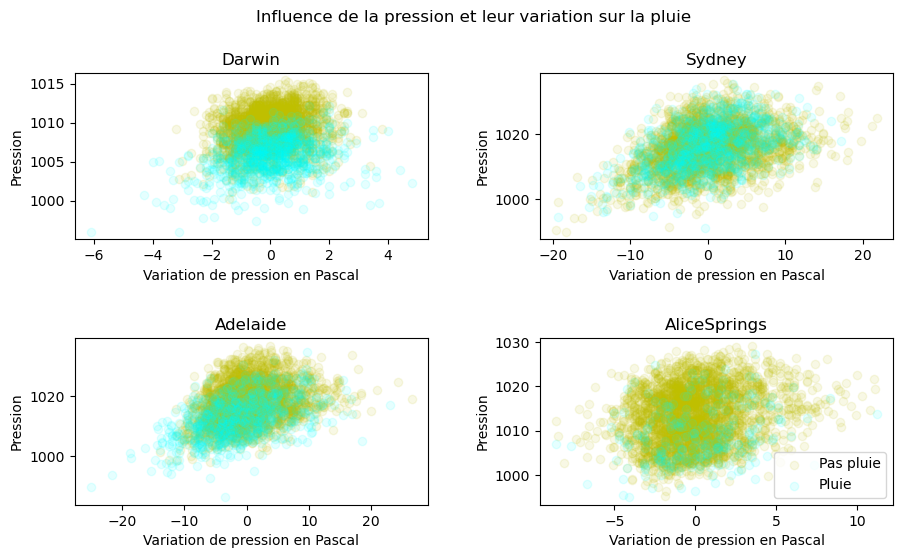

In [3]:
toplot=df[df['Location']=='Adelaide']
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)


fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
print(axes[1,1])
i=0

print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    toplot=df[df['Location']==ville]
    ax.scatter('varpressure','Pressure3pm',data=toplot.loc[toplot.RainTomorrow==0],c="y",alpha=.1 ,label="Pas pluie")
    ax.scatter('varpressure','Pressure3pm',data=toplot.loc[toplot.RainTomorrow==1],c="cyan",alpha=.1 ,label="Pluie")
    ax.set_xlabel("Variation de pression en Pascal")
    ax.set_ylabel("Pression")
    ax.set_title(ville)
    i+=1
fig.suptitle("Influence de la pression et leur variation sur la pluie")
plt.legend()
plt.show()




AxesSubplot(0.566569,0.155278;0.352924x0.277685)
<class 'int'>


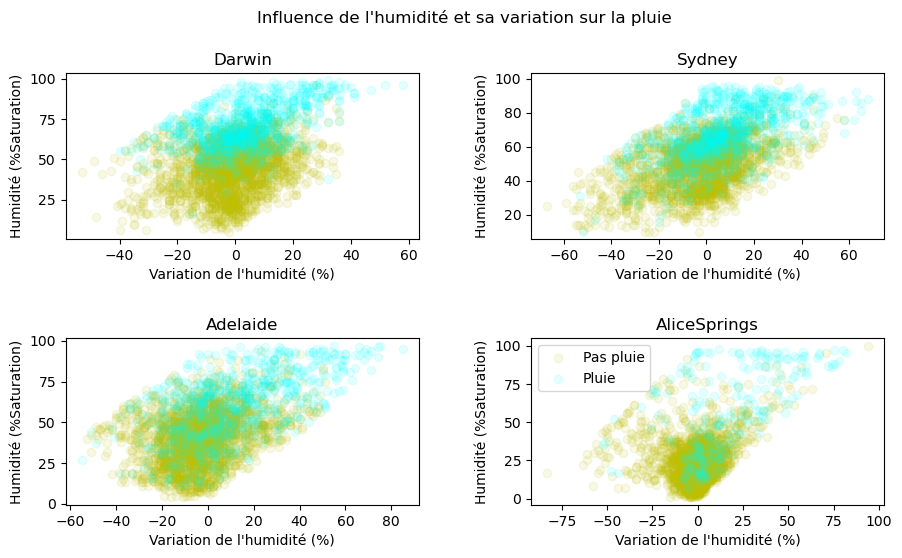

In [4]:
toplot=df[df['Location']=='Adelaide']
from matplotlib.pyplot import figure

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
print(axes[1,1])
i=0

print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    toplot=df[df['Location']==ville]
    ax.scatter('varhumidity','Humidity3pm',data=toplot.loc[toplot.RainTomorrow==0],c="y",alpha=.1 ,label="Pas pluie")
    ax.scatter('varhumidity','Humidity3pm',data=toplot.loc[toplot.RainTomorrow==1],c="cyan",alpha=.1 ,label="Pluie")
    ax.set_xlabel("Variation de l'humidité (%)")
    ax.set_ylabel("Humidité (%Saturation)")
    ax.set_title(ville)
    i+=1
fig.suptitle("Influence de l'humidité et sa variation sur la pluie")
plt.legend()
plt.show()




AxesSubplot(0.566569,0.155278;0.352924x0.277685)
<class 'int'>


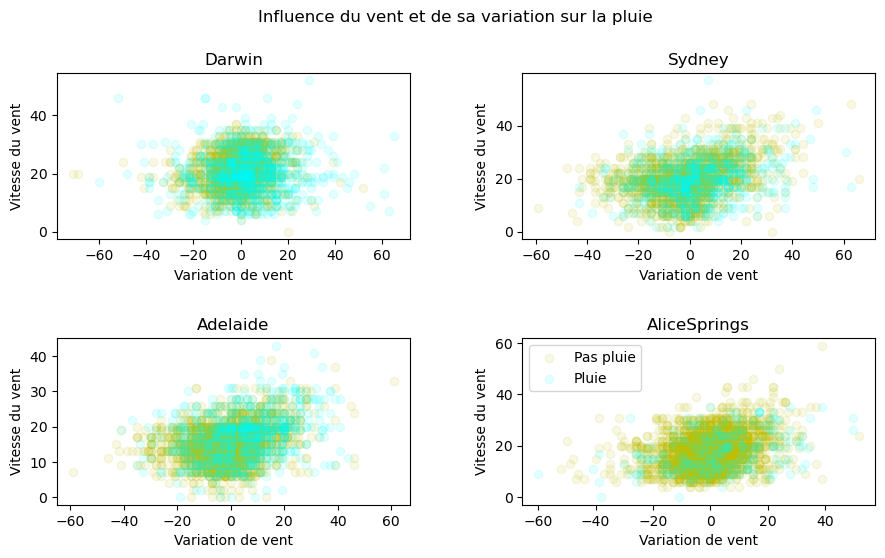

In [5]:
toplot=df[df['Location']=='Adelaide']
from matplotlib.pyplot import figure

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,6))
fig.tight_layout(pad=5)
print(axes[1,1])
i=0

print(type(i%2))
for ville in ['Darwin','Sydney','Adelaide','AliceSprings']:
    ax=axes[i//2,i%2]
    toplot=df[df['Location']==ville]
    ax.scatter('varwind','WindSpeed3pm',data=toplot.loc[toplot.RainTomorrow==0],c="y",alpha=.1 ,label="Pas pluie")
    ax.scatter('varwind','WindSpeed3pm',data=toplot.loc[toplot.RainTomorrow==1],c="cyan",alpha=.1 ,label="Pluie")
    ax.set_xlabel("Variation de vent")
    ax.set_ylabel("Vitesse du vent")
    ax.set_title(ville)
    i+=1
fig.suptitle("Influence du vent et de sa variation sur la pluie")
plt.legend()
plt.show()




## Intérêt de l'enrichisement des données avec des variables de second ordre

In [6]:
df_augmente=pd.read_csv('enricheredaus_sanscluster.csv')
df_augmente.head()
df_augmente=df_augmente.iloc[:,-3:].join(df_augmente['RainTomorrow'])
df_augmente=df_augmente.dropna()

df_augmente.replace({'No': 0}, inplace=True)
df_augmente.replace({'Yes': 1}, inplace=True)
df_augmente.head()


,vartemp,varwind,varhumidity,RainTomorrow
1,2.5,0.0,3.0,0
2,-1.1,2.0,5.0,0
3,3.3,-22.0,-14.0,0
4,3.2,17.0,17.0,0
5,-0.8,15.0,-10.0,0


In [ ]:
Affichage de la table de corrélation sur les variables enrichies

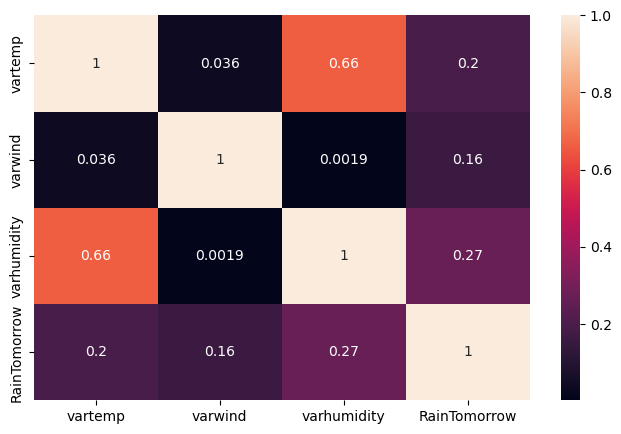

In [7]:
correlation=abs(df_augmente.corr())

plt.figure(figsize = (8,5))
sns.heatmap(correlation, annot=True)
plt.show()
